In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [119]:
df = yf.download('005930.KS', '2021-01-01', '2023-07-01')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,81000.0,84400.0,80200.0,83000.0,78701.046875,38655276
2021-01-05,81600.0,83900.0,81600.0,83900.0,79554.437500,35335669
2021-01-06,83300.0,84500.0,82100.0,82200.0,77942.484375,42089013
2021-01-07,82800.0,84200.0,82700.0,82900.0,78606.242188,32644642
2021-01-08,83300.0,90000.0,83000.0,88800.0,84200.664062,59013307
...,...,...,...,...,...,...
2023-06-26,71700.0,72500.0,71500.0,72400.0,72040.492188,10541901
2023-06-27,72500.0,72600.0,72000.0,72600.0,72239.500000,9442997
2023-06-28,72600.0,72700.0,72000.0,72700.0,72339.000000,8783093


In [120]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)

    return numerator / (denominator + 1e-7)

In [121]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [122]:
dfx = df[['Open', 'High', 'Low', 'Volume']]
dfx = MinMaxScaler(dfx)

dfy = df[['Close']]


dfx

,Open,High,Low,Volume
Date,,,,
2021-01-04,0.755263,0.712963,0.753316,0.428047
2021-01-05,0.771053,0.701389,0.790451,0.391287
2021-01-06,0.815789,0.715278,0.803714,0.466070
2021-01-07,0.802632,0.708333,0.819629,0.361488
2021-01-08,0.815789,0.842593,0.827586,0.653480
...,...,...,...,...
2023-06-26,0.510526,0.437500,0.522546,0.116735
2023-06-27,0.531579,0.439815,0.535809,0.104566
2023-06-28,0.534211,0.442130,0.535809,0.097259


In [123]:
dfx.describe()

,Open,High,Low,Volume
count,615.000000,615.000000,615.000000,615.000000
mean,0.472435,0.397892,0.473602,0.168885
std,0.243103,0.215613,0.242551,0.090437
min,0.000000,0.000000,0.000000,0.000000
25%,0.240789,0.193287,0.244032,0.124468
50%,0.471053,0.393519,0.480106,0.153791
75%,0.702632,0.597222,0.708223,0.199526
max,1.000000,1.000000,1.000000,1.000000


In [124]:
dfy.head()

,Close
Date,
2021-01-04,83000.0
2021-01-05,83900.0
2021-01-06,82200.0
2021-01-07,82900.0
2021-01-08,88800.0


In [125]:
time_step = 10
step = 1

def create_dataset(X, y, time_step, step):
    Xs, ys = [], []

    for i in range(0, len(X) - time_step, step):
        v = X.iloc[i : (i + time_step)].values
        labels = y.iloc[i + time_step]

        Xs.append(v)
        ys.append(labels)

    return np.array(Xs), np.array(ys)


In [126]:
X, y = create_dataset(dfx, dfy, time_step, step)

X.shape

(605, 10, 4)

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((405, 10, 4), (200, 10, 4), (405, 1), (200, 1))

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

In [129]:
model = Sequential([
    SimpleRNN(20, activation='relu', input_shape=(X.shape[1:]), return_sequences=True),
    Dropout(0.5),
    SimpleRNN(20, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_14 (SimpleRNN)   (None, 10, 20)            500       
                                                                 
 dropout_14 (Dropout)        (None, 10, 20)            0         
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 20)                820       
                                                                 
 dropout_15 (Dropout)        (None, 20)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,341
Trainable params: 1,341
Non-trainable params: 0
_________________________________________________________________


In [130]:
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D
# Model 1
model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1:])))
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))


model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1))
model2.compile(loss='mse', optimizer='adam')
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 8, 64)             832       
                                                                 
 conv1d_4 (Conv1D)           (None, 6, 64)             12352     
                                                                 
 conv1d_5 (Conv1D)           (None, 4, 64)             12352     
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 58,561
Trainable params: 58,561
Non-trai

In [131]:
model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.33, shuffle=False)

In [133]:
history2 = model2.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.33, shuffle=False)

Epoch 1/500
9/9 [==============================] - 1s 19ms/step - loss: 6169007616.0000 - val_loss: 4147326976.0000
Epoch 2/500
9/9 [==============================] - 0s 8ms/step - loss: 6168566784.0000 - val_loss: 4146822144.0000
Epoch 3/500
9/9 [==============================] - 0s 6ms/step - loss: 6166475264.0000 - val_loss: 4144728064.0000
Epoch 4/500
9/9 [==============================] - 0s 6ms/step - loss: 6158754304.0000 - val_loss: 4137756672.0000
Epoch 5/500
9/9 [==============================] - 0s 6ms/step - loss: 6135165952.0000 - val_loss: 4118093824.0000
Epoch 6/500
9/9 [==============================] - 0s 5ms/step - loss: 6073009152.0000 - val_loss: 4069620224.0000
Epoch 7/500
9/9 [==============================] - 0s 4ms/step - loss: 5928223232.0000 - val_loss: 3962961664.0000
Epoch 8/500
9/9 [==============================] - 0s 7ms/step - loss: 5625814528.0000 - val_loss: 3750900992.0000
Epoch 9/500
9/9 [==============================] - 0s 5ms/step - loss: 50564285

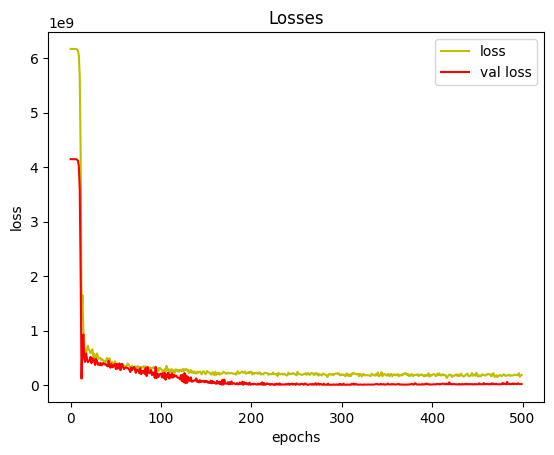

In [134]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x = np.arange(0, len(history.history['loss']))

plt.plot(x, loss, 'y', label='loss')
plt.plot(x, val_loss, 'r', label='val loss')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [135]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 3ms/step


In [136]:
X_test.shape

(200, 10, 4)

In [137]:
y_pred2 = model2.predict(X_test)

7/7 [==============================] - 0s 3ms/step


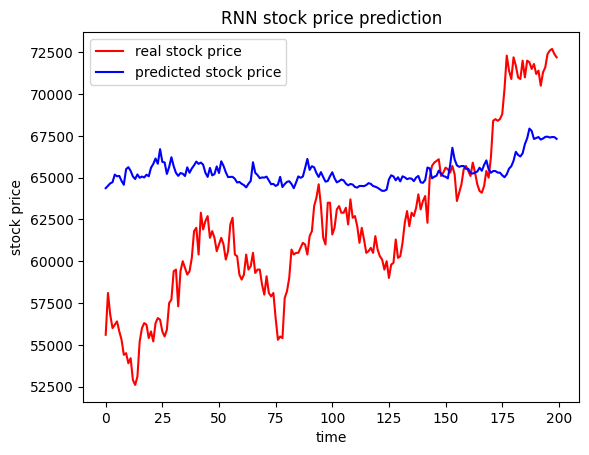

In [138]:
y_pred.shape

plt.plot(y_test, color='red', label='real stock price')
plt.plot(y_pred, color='blue', label='predicted stock price')
plt.title('RNN stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

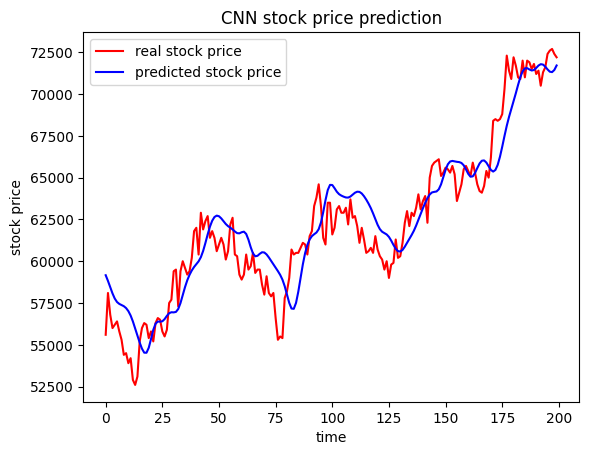

In [139]:
plt.plot(y_test, color='red', label='real stock price')
plt.plot(y_pred2, color='blue', label='predicted stock price')
plt.title('CNN stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [140]:
df2 = pd.read_csv('./Data/DailyDelhiClimateTrain.csv')
df3 = pd.read_csv('./Data/DailyDelhiClimateTest.csv')

In [141]:
df2

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [142]:
df3

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [143]:
df2.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [144]:
dfx = df2[['humidity', 'wind_speed', 'meanpressure']]
dfx = MinMaxScaler(dfx)

dfy = df2[['meantemp']]

dfx

,humidity,wind_speed,meanpressure
0,0.820957,0.000000,0.132603
1,0.907591,0.070583,0.132881
2,0.849835,0.109743,0.132994
3,0.668867,0.029212,0.132799
4,0.847910,0.087636,0.132712
...,...,...,...
1457,0.630865,0.084032,0.132590
1458,0.859736,0.142113,0.132764
1459,0.880638,0.148429,0.132895
1460,0.849835,0.173496,0.132660


In [145]:
dfx2 = df3[['humidity', 'wind_speed', 'meanpressure']]
dfx2 = MinMaxScaler(dfx2)

dfy2 = df3[['meantemp']]

dfx2

,humidity,wind_speed,meanpressure
0,0.872396,0.075640,0.000000
1,0.761651,0.084061,0.995298
2,0.821416,0.146661,0.995356
3,0.669797,0.176133,0.992624
4,0.732480,0.106684,0.991206
...,...,...,...
109,0.124867,0.232892,0.974907
110,0.276948,0.310987,0.976204
111,0.296478,0.418508,0.977994
112,0.124867,0.478334,0.978539


In [146]:
X, y = create_dataset(dfx, dfy, time_step, step)

X.shape

(1452, 10, 3)

In [147]:
X2, y2 = create_dataset(dfx2, dfy2, time_step, step)

In [148]:
X2.shape

(104, 10, 3)

In [149]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1089, 10, 3), (363, 10, 3), (1089, 1), (363, 1))

In [150]:
model = Sequential([
    SimpleRNN(20, activation='relu', input_shape=(X.shape[1:]), return_sequences=True),
    Dropout(0.5),
    SimpleRNN(20, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_16 (SimpleRNN)   (None, 10, 20)            480       
                                                                 
 dropout_16 (Dropout)        (None, 10, 20)            0         
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 20)                820       
                                                                 
 dropout_17 (Dropout)        (None, 20)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [151]:
model.compile(loss='mse', optimizer='adam')

In [152]:
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data = (X_val, y_val), shuffle=False)

Epoch 1/500


35/35 [==============================] - 2s 10ms/step - loss: 651.5717 - val_loss: 661.9202
Epoch 2/500
35/35 [==============================] - 0s 4ms/step - loss: 303.9154 - val_loss: 112.9289
Epoch 3/500
35/35 [==============================] - 0s 4ms/step - loss: 167.0056 - val_loss: 92.6489
Epoch 4/500
35/35 [==============================] - 0s 5ms/step - loss: 143.8884 - val_loss: 79.7865
Epoch 5/500
35/35 [==============================] - 0s 4ms/step - loss: 145.0708 - val_loss: 85.4457
Epoch 6/500
35/35 [==============================] - 0s 5ms/step - loss: 123.4321 - val_loss: 69.0275
Epoch 7/500
35/35 [==============================] - 0s 4ms/step - loss: 124.8824 - val_loss: 69.5228
Epoch 8/500
35/35 [==============================] - 0s 4ms/step - loss: 111.4757 - val_loss: 57.8080
Epoch 9/500
35/35 [==============================] - 0s 4ms/step - loss: 103.3981 - val_loss: 53.5324
Epoch 10/500
35/35 [==============================] - 0s 5ms/step - loss: 98.5106 - val_los

In [153]:
model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1:])))
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))


model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1))
model2.compile(loss='mse', optimizer='adam')
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 8, 64)             640       
                                                                 
 conv1d_7 (Conv1D)           (None, 6, 64)             12352     
                                                                 
 conv1d_8 (Conv1D)           (None, 4, 64)             12352     
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 58,369
Trainable params: 58,369
Non-tra

In [154]:
history2 = model2.fit(X_train, y_train, epochs=500, batch_size=32, validation_data = (X_val, y_val), shuffle=False)

Epoch 1/500
35/35 [==============================] - 1s 6ms/step - loss: 357.9625 - val_loss: 84.3543
Epoch 2/500
35/35 [==============================] - 0s 3ms/step - loss: 109.1405 - val_loss: 62.0114
Epoch 3/500
35/35 [==============================] - 0s 3ms/step - loss: 82.2477 - val_loss: 45.5941
Epoch 4/500
35/35 [==============================] - 0s 4ms/step - loss: 64.5675 - val_loss: 36.6348
Epoch 5/500
35/35 [==============================] - 0s 4ms/step - loss: 54.1157 - val_loss: 35.1954
Epoch 6/500
35/35 [==============================] - 0s 4ms/step - loss: 50.1169 - val_loss: 36.1046
Epoch 7/500
35/35 [==============================] - 0s 4ms/step - loss: 48.9656 - val_loss: 36.4849
Epoch 8/500
35/35 [==============================] - 0s 3ms/step - loss: 48.3215 - val_loss: 36.6060
Epoch 9/500
35/35 [==============================] - 0s 3ms/step - loss: 47.8250 - val_loss: 36.6283
Epoch 10/500
35/35 [==============================] - 0s 4ms/step - loss: 47.4728 - val_l

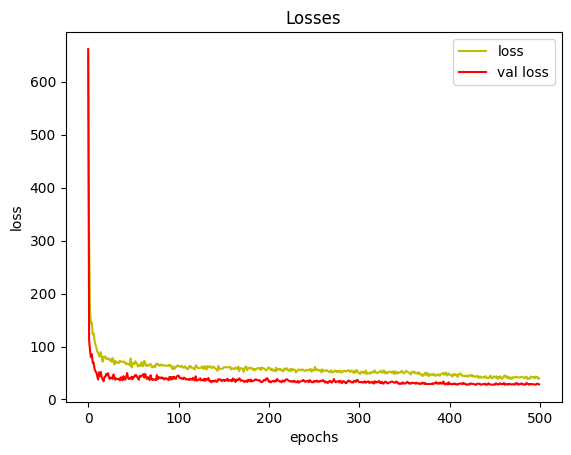

In [155]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x = np.arange(0, len(history.history['loss']))

plt.plot(x, loss, 'y', label='loss')
plt.plot(x, val_loss, 'r', label='val loss')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [156]:
y_pred = model.predict(X2)
y_pred2 = model2.predict(X2)

4/4 [==============================] - 0s 2ms/step


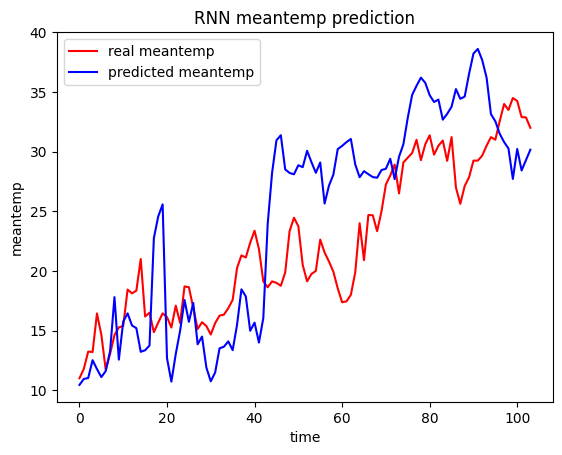

In [157]:
y_pred.shape

plt.plot(y2, color='red', label='real meantemp')
plt.plot(y_pred, color='blue', label='predicted meantemp')
plt.title('RNN meantemp prediction')
plt.xlabel('time')
plt.ylabel('meantemp')
plt.legend()
plt.show()

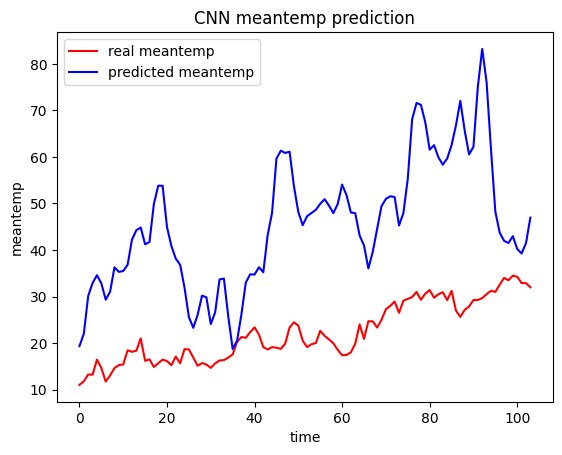

In [158]:
plt.plot(y2, color='red', label='real meantemp')
plt.plot(y_pred2, color='blue', label='predicted meantemp')
plt.title('CNN meantemp prediction')
plt.xlabel('time')
plt.ylabel('meantemp')
plt.legend()
plt.show()